# **Heritage house price correlation notebook**

## Objectives

* Answer business requirement 1:
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visilisations of the correlated variables against the sale price to showcase this.


## Inputs

* inputs/datasets/raw/house-price-20211124T154130Z-001

## Outputs

* Generate code that answers business requirement 1 and can be used to build the Streamlit App

## Conclusions

* The analysis indicates that the overall build quality of a property (OverallQual) exhibits the strongest correlation with the Sale Price (SalePrice). This relationship is clearly illustrated in the box plot and is further supported by the highest correlation coefficients observed in both the Pearson and Spearman correlation methods.

* The variables ground living area (GrLivArea), 1st floor square footage (1stFlrSF), total basement area (TotalBsmtSF), and garage area (GarageArea) also show significant correlations with Sale Price. The accompanying scatterplots demonstrate steep positive linear regression lines, suggesting that these features play a substantial role in determining the sale price of a property.

* The year built (YearBuilt) has a stong correlation also so should not be overlooked. The scatterplot shows a positive linear regression. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-predictive-analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-predictive-analytics'

# Load data

As specified in the data collection notebook, I have dropped the two categories with very high number of missing values.Enclosed Porch and WoodDesckSF.

In [4]:
import pandas as pd
df = (pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
        .drop(['EnclosedPorch', 'WoodDeckSF'], axis=1)
    )
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,642,Unf,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,836,RFn,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


---

# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context
We use the Pandas profiling report.

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There are 22 features, 18 numeric and 4 categoric. 6 features have some null values. 7 features have a proportion of zeros, with 2ndFlrSF having over 50% zero values.

---

# Correlation Study

The 4 categorical variables need to be converted to numeric for analysis.<br>
* Custom ordinal mapping has been used to encode the categorical features as they have an order of quality which is relevant to the target.<br><br>
This setup should yield a more interpretable correlation matrix where higher values in each feature correspond more directly with SalePrice.

In [6]:
mappings = {
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'Missing': -1, 'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'GarageFinish': {'Missing': -1, 'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
    'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
}

df.replace(mappings, inplace=True)

df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,1,706,6.0,150,548,2.0,2003.0,...,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,4,978,5.0,284,460,2.0,1976.0,...,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,2,486,6.0,434,608,2.0,2001.0,...,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,NaN,NaN,1,216,5.0,540,642,1.0,1998.0,...,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,NaN,4.0,3,655,6.0,490,836,2.0,2000.0,...,14260,84.0,350.0,84,5,8,1145,2000,2000,250000


We use the Spearman and Pearson methods to analyze and quantify the relationships between variables in the dataset.<br> The Pearson method evaluates linear relationships, while the Spearman method assesses monotonic relationships, allowing us to capture both linear and non-linear dependencies. By leveraging both methods, we gain a comprehensive understanding of how features correlate with the target variable, sale price.

We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We sort values considering the absolute value, by setting `key=abs`

In [7]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_spearman

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageFinish    0.636076
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [8]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False).head(10)
corr_pearson

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GarageFinish    0.544382
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Both the Spearman and Pearson correlation coefficients reveal key features that are strongly correlated with the Sale price.<br><br>
* The Overall quality, ground living area and kitchen quality have the highest positive correlation in both analyses.
* Garage area and Total basement area both show strong positive relationships, highlighting the added value of larger, functional spaces.
* Year built and Year of Remodel are also correlated, meaning newer and more recently renovated homes tend to have higher values, although year of remodel has a lower corellation overall.
* 1st floor area also has a high correlation and I believe is a critical feature for predicting the house price.

## PPS-Power predictive score

The predictive power score (PPS) analysis reveals the strength of the feature-target relationships within the dataset.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [15]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.054  0.104  0.0  0.0  0.0  0.055  0.702


The PPS statistics indicate that while most features in the dataset have low or no predictive power, a few features exhibit strong relationships with their targets. This can be seen in the following heat maps.



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



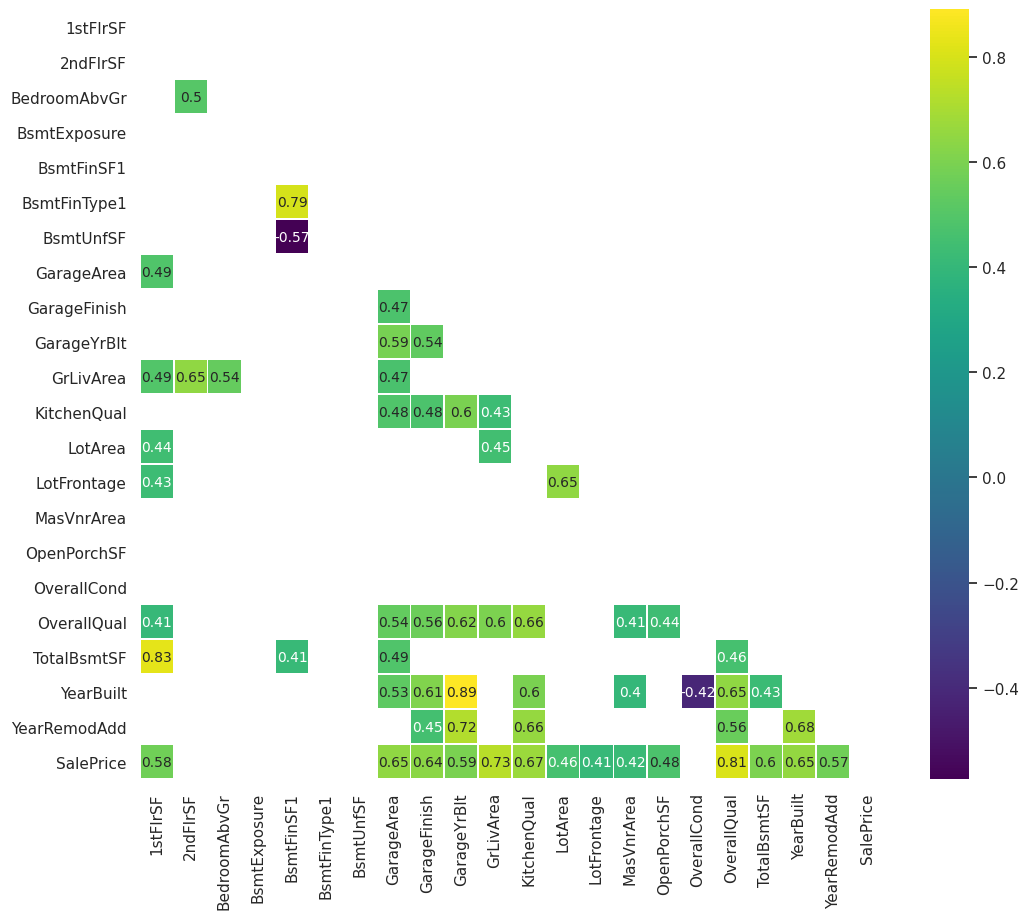



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



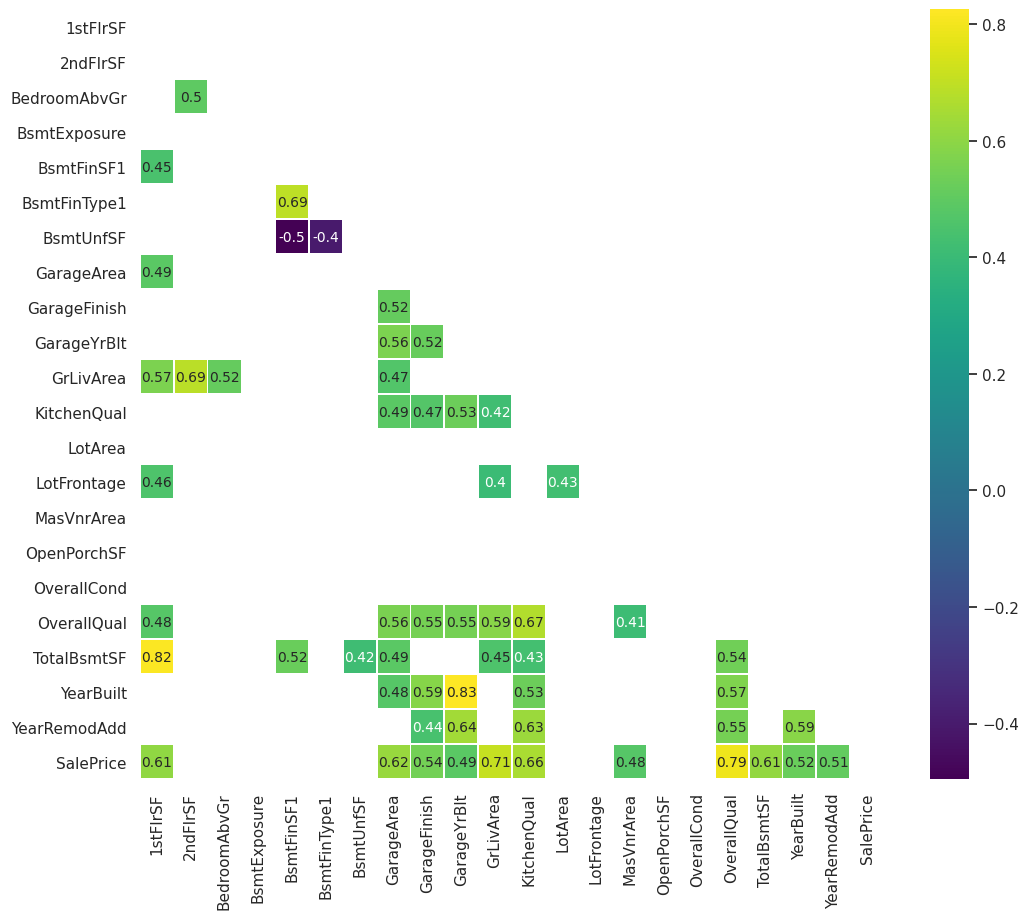



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



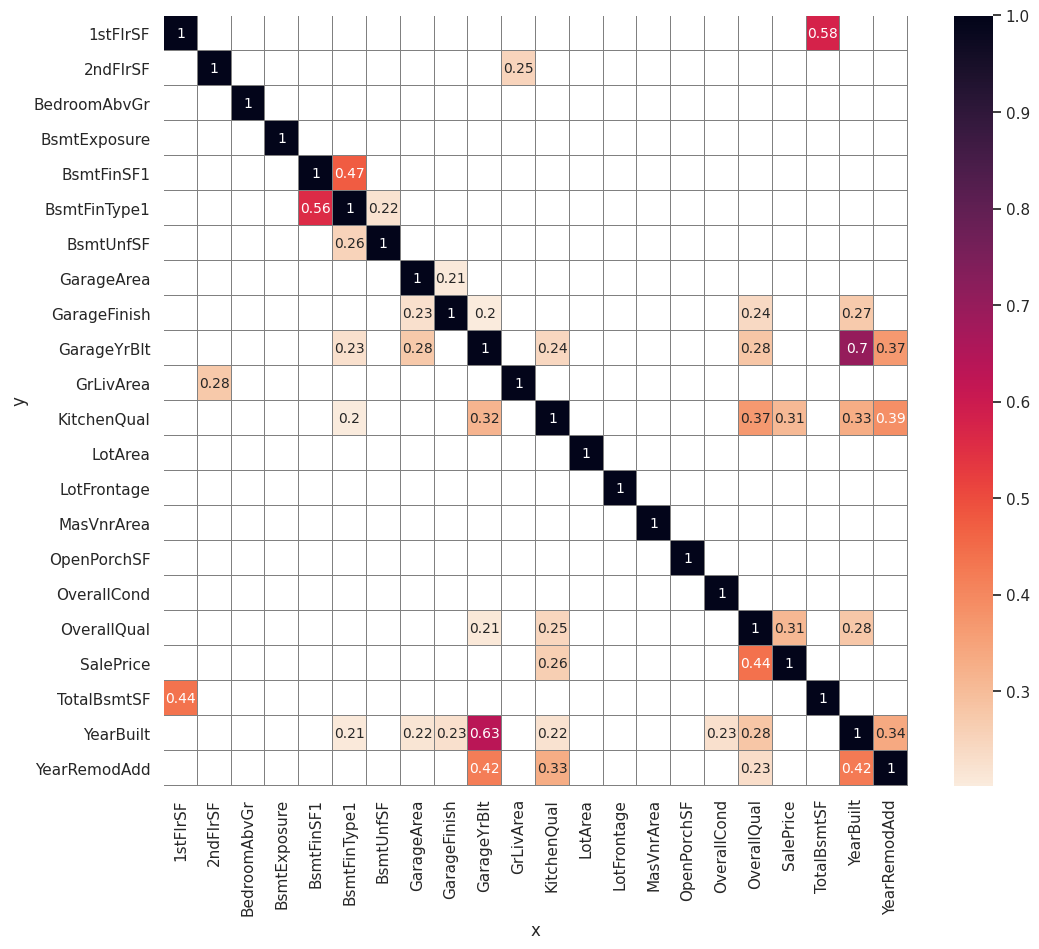

In [ ]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

Based on the Spearman/ Pearson methods and the PPS analysis, we will investigate the most relevant variables correlated to the sale price, which we believe to be:

* OverallQual - Overall quality of the build
* GrLivArea - Ground Living area
* GarageArea - Garage area
* TotalBsmtSF - Total basement area
* YearBuilt - Year of construction
* 1stFlrSF - 1st floor area

In [9]:
vars_to_study = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF']
vars_to_study

['OverallQual',
 'GrLivArea',
 'GarageArea',
 'TotalBsmtSF',
 'YearBuilt',
 '1stFlrSF']

# EDA on selected variables

Exploratory data analysis using the features that have high correlation with out target, SalePrice.

We create a separate DataFrame for the EDA by adding SalePrice so that we can use data visualization to draw insights about the relationship between each feature and the target.

In [10]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head(3)

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,YearBuilt,1stFlrSF,SalePrice
0,7,1710,548,856,2003,856,208500
1,6,1262,460,1262,1976,1262,181500
2,7,1786,608,920,2001,920,223500


## Variables Distribution by Sale Price

The following scatter plots show the correlation between continuous variables (GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt) and SalePrice.

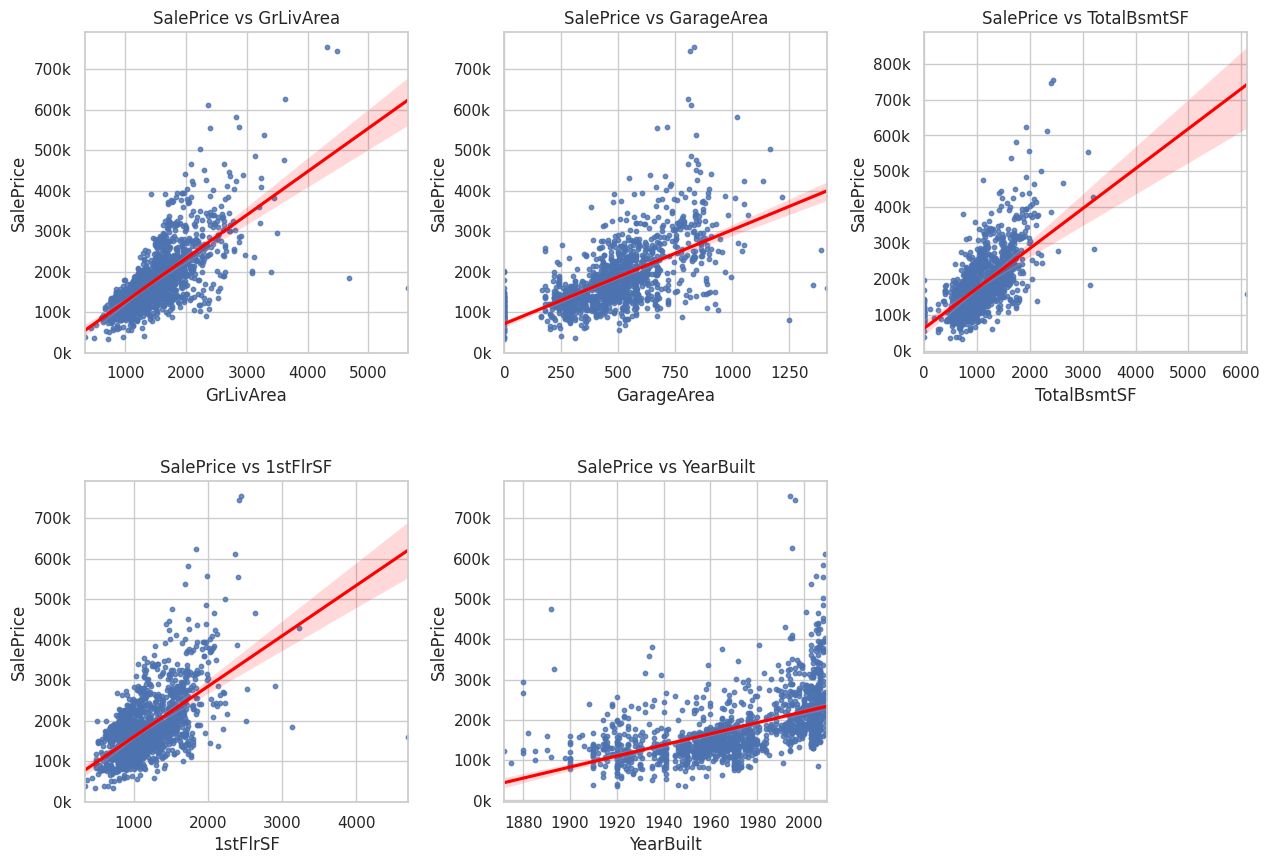

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
sns.set(style="whitegrid")

df_eda['PriceCategory'] = pd.qcut(df_eda['SalePrice'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(15, 10))

for i, var in enumerate(['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']):
    plt.subplot(2, 3, i+1)
    sns.regplot(data=df_eda, x=var, y='SalePrice', scatter_kws={'s': 10}, line_kws={"color": "red"})
    plt.title(f'SalePrice vs {var}')
    plt.xlabel(var)
    plt.ylabel('SalePrice')

    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

The following box plot displays the median and quartile ranges of SalePrice across different quality levels, highlighting the spread of values within each quality rating.

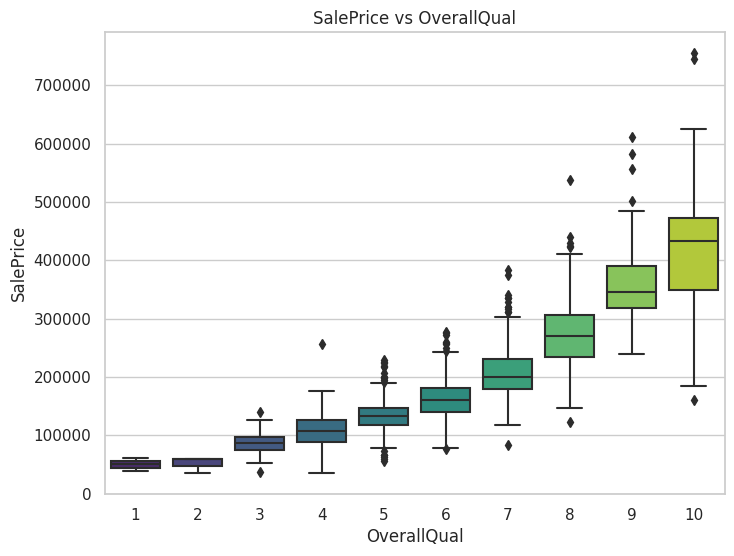

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_eda, x='OverallQual', y='SalePrice', palette='viridis')
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()

---

# Heat Map

The following heat map shows the combined average Pearson and Spearman correlations between the selcted features. Darker shades of red indicate stronger positive correlations, while darker shades of blue represent stronger negative correlations. Combining the two methods provides a balanced perspective by leveraging the strengths of both. Pearson may fail to detect strong monotonic relationships that are not linear, while Spearman excels in identifying such patterns.

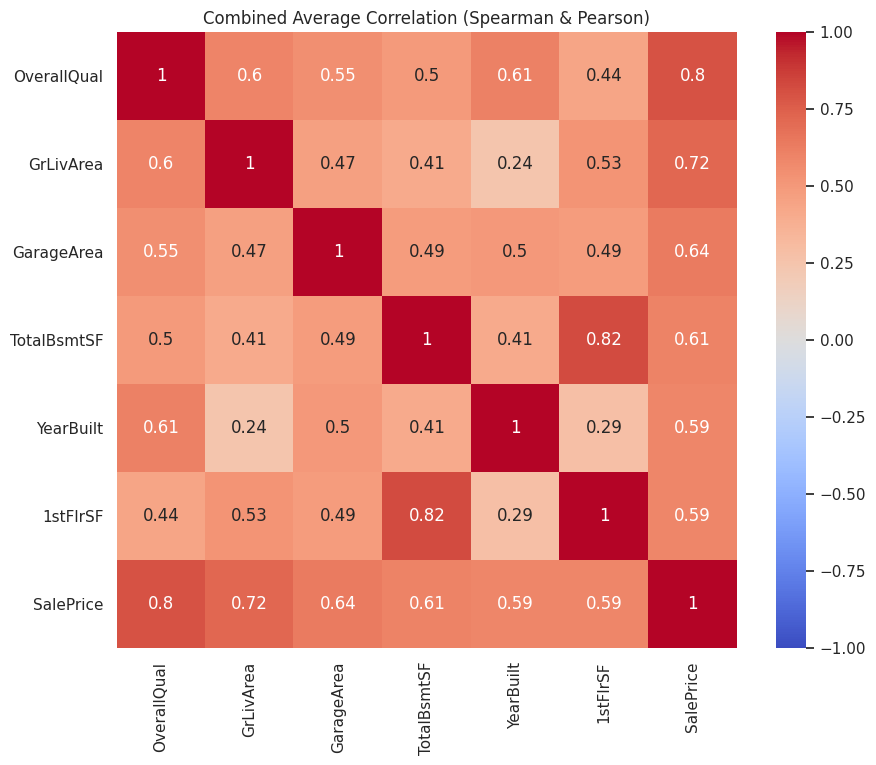

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_spearman = df_eda.corr(method='spearman')
corr_pearson = df_eda.corr(method='pearson')

combined_corr = (corr_spearman + corr_pearson) / 2

plt.figure(figsize=(10, 8))
sns.heatmap(combined_corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Combined Average Correlation (Spearman & Pearson)")
plt.show()

# Conclusions and Next Steps

* The analysis indicates that the overall build quality of a property (OverallQual) exhibits the strongest correlation with the Sale Price (SalePrice). This relationship is clearly illustrated in the box plot and is further supported by the highest correlation coefficients observed in both the Pearson and Spearman correlation methods.

* The variables ground living area (GrLivArea), 1st floor square footage (1stFlrSF), total basement area (TotalBsmtSF), and garage area (GarageArea) also show significant correlations with Sale Price. The accompanying scatterplots demonstrate steep positive linear regression lines, suggesting that these features play a substantial role in determining the sale price of a property.

* The year built (YearBuilt) has a stong correlation also so should not be overlooked. The scatterplot shows a positive linear regression. 